# Plotting Model Predictions 

In [9]:
# Import necessary packages
import numpy as np
import pandas as pd
import tensorflow as tf
import scipy as scp
import matplotlib.pyplot as plt
import os
import dnnregressor_predictor as dnn_pred
import dnnregressor_model_and_input_fn as dnn_model_input
import make_data_wfpt as mdw

In [10]:
hyper_params = pd.read_csv('/Users/admin/Desktop/ddm_project/code/tensorflow_models/dnnregressor_mae_0/model_params.csv',
                          converters = {'hidden_units':eval,
                                        'activations':eval})

model_params = hyper_params.to_dict(orient = 'list')
for key in model_params.keys():
    model_params[key] = model_params[key][0]

In [11]:
# Generate a dataset 
dataset = mdw.make_data(v_range = [0.5,0.5], 
                        a_range = [0.5,0.5],
                        w_range = [0.5, 0.5], 
                        rt_params = [1,2],
                        n_samples = 10000)

In [16]:
# Make dataset feedable to tensorflow
features, labels, __, ___ = mdw.train_test_split(data = dataset,
                                              p_train = 1,
                                              write_to_file = False)

# Make feature columns
feature_columns = dnn_model_input.make_feature_columns_numeric(features = features)
model_params['feature_columns'] = feature_columns

# Reinstantiate model
my_predictor = dnn_pred.get_dnnreg_predictor(model_directory = '/Users/admin/Desktop/ddm_project/code/tensorflow_models/dnnregressor_mse_0',
                                             params = model_params)

In [17]:
# Get Predictions
my_predictions = dnn_pred.get_predictions(regressor = my_predictor,
                                         features =  features,
                                         labels = labels)

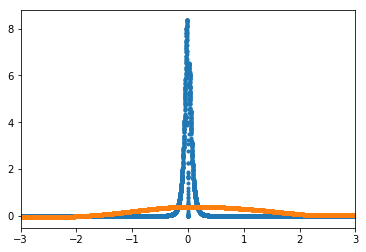

In [18]:
# Plot outcome
plt.plot(dataset['rt'], dataset['nf_likelihood'], '.')
plt.plot(dataset['rt'], my_predictions, '.')
plt.xlim((-3,3))
plt.show()

In [20]:
min(my_predictions['output'])

array([[-0.09470009]], dtype=float32)